First, lets try a time series analysis of the sightings. Let's see if there are any interesting changes or patterns to the sightings over time. 

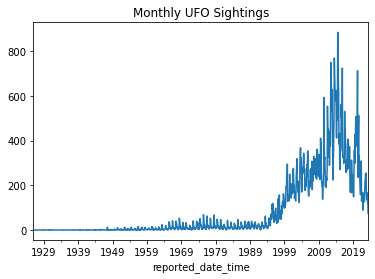

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ufo_sightings = pd.read_csv('ufo_sightings.csv')
ufo_sightings['reported_date_time'] = pd.to_datetime(ufo_sightings['reported_date_time'])
ufo_sightings.set_index('reported_date_time', inplace=True)

monthly_sightings = ufo_sightings.resample('M').size()
monthly_sightings.plot()
plt.title('Monthly UFO Sightings')
plt.show()

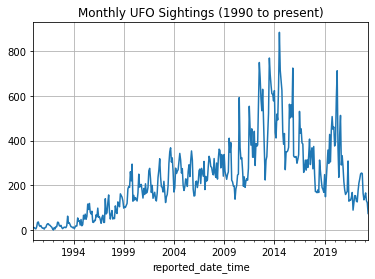

In [11]:
# Select the data from 1990 onwards
monthly_sightings = monthly_sightings.loc['1990':]

# Plot the data
monthly_sightings.plot()
plt.title('Monthly UFO Sightings (1990 to present)')
plt.grid(True)
plt.show()

In [10]:
# Resample the data to yearly frequency and get the size
yearly_sightings = ufo_sightings.resample('Y').size()

# Find the year with the maximum count
max_sightings_year = yearly_sightings.idxmax().year

print(f"The year with the most UFO sightings is {max_sightings_year}")

The year with the most UFO sightings is 2014


Geographic distribution of UFO sightings

In [3]:
sightings_by_city = ufo_sightings['city'].value_counts()
print(sightings_by_city.head(10))

New York City    667
Seattle          666
Phoenix          634
Las Vegas        553
Portland         541
Los Angeles      518
San Diego        481
Tucson           383
Houston          373
Chicago          348
Name: city, dtype: int64


Correlation between Population/Elevation and Sightings

In [4]:
places = pd.read_csv('places.csv')
merged_data = pd.merge(ufo_sightings, places, on=['city', 'state'])
correlation = merged_data[['population', 'elevation_m']].corr()
print(correlation)


             population  elevation_m
population      1.00000     -0.06516
elevation_m    -0.06516      1.00000


Pattern of sightings during different Twilight times